<a href="https://colab.research.google.com/github/sathwikyaragani/ml_adproject/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
file_name = "/content/iris.csv"

In [3]:
iris = pd.read_csv(file_name)
iris

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [4]:
iris = iris.rename(columns={'Species':'Flower_Types'})
iris

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Flower_Types
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [5]:
y = iris['Flower_Types']
y

,Flower_Types
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [6]:
iris['Flower_Types']

,Flower_Types
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [7]:
label_encoder = sklearn.preprocessing.LabelEncoder()
iris['Flower_Types'] = label_encoder.fit_transform(iris['Flower_Types'])

In [8]:
x = iris.iloc[:,0:4]
x

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


In [9]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.2)

In [10]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.4, 0.8333333333333334, 'x[3] <= 2.6\nentropy = 1.583\nsamples = 120\nvalue = [41, 42, 37]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 101.0\nentropy = 0.997\nsamples = 79\nvalue = [0.0, 42.0, 37.0]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

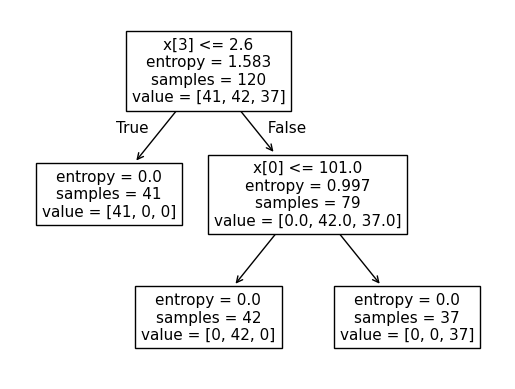

In [11]:
tree.plot_tree(model)


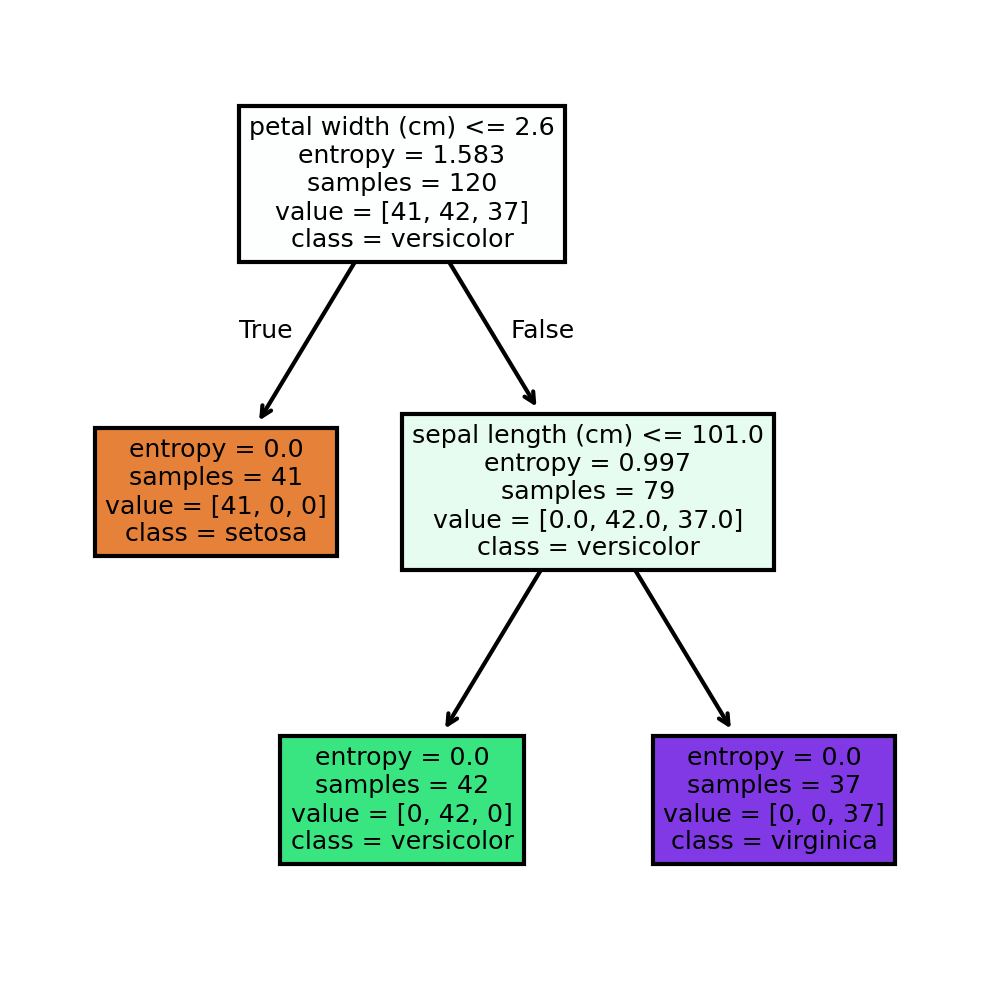

In [12]:
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa','versicolor','virginica']
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,
               feature_names=fn,
               class_names=cn,
               filled=True);

In [13]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

,count
virginica,12
versicolor,9
setosa,9


In [14]:
preds

array(['versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'virginica', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'setosa', 'versicolor', 'virginica'], dtype=object)

In [15]:
pd.crosstab(y_test,preds)

col_0,setosa,versicolor,virginica
Flower_Types,,,
setosa,9,0,0
versicolor,0,8,0
virginica,0,1,12


In [16]:
np.mean(preds==y_test)

np.float64(0.9666666666666667)

In [17]:
 accuracy_score(y_test,preds)

0.9666666666666667

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
array = iris.values
x = array[:,0:3]
y = array[:,3]


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=1)

In [25]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [26]:
model.score(x_test,y_test)

0.9579625554173444